<a href="https://www.kaggle.com/code/adharsh1623/detectron-1?scriptVersionId=111555608" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# install dependencies: 
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 703.8/703.8 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 20.7 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0
    Uninstalling torch-1.11.0:
      Successfully uninstalled torch-1.11.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0
    Uninstalling torchvision-0.12.0:
      Successfully uninstalled torchvision-0.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytorch-lightning 1.7.7 requires torch>=1.9.*, but you have torch 1.5.0+cu101 which is incompatible.
kornia 0.5.8 requires torch>=1.6.0, but you have torch 1.5.0+cu101 which is incompatible.
fastai 2.7.9 requires torch<1.14,>=1.7, but you have torch 1.5.0+cu101 wh

In [3]:
!curl -L "https://app.roboflow.com/ds/kTTgQR7S53?key=lxG4U31DWF" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   893  100   893    0     0    455      0  0:00:01  0:00:01 --:--:--   455
100 19.9M  100 19.9M    0     0  8336k      0  0:00:02  0:00:02 --:--:-- 42.6M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/0ccd6d5d-6896-4ce5-8b14-87a794412881___MD_Powd-M-0543_JPG.rf.eb56cc9206d14885800075a307839c9d.jpg  
 extracting: test/0ef07958-0cdf-4dad-a4de-b4d5a773f223___UMD_Powd-M-9978_JPG.rf.70fb38c1f69a6f9bb5721951a04d2a12.jpg  
 extracting: test/1-338-_jpg.rf.1b62ec00faa9da6b2d1e3a6e51bb1446.jpg  
 extracting: test/Black-Spot-2-_jpg.rf.094c359b67eb44dd2de76258cbd377ce.jpg  
 extracting: test/Black-Spot-27-_jpg.rf.30925fe292c03f5747327c1bdf2f47a3.jpg  
 extracting: test/Black-Spot-31-_jpg.rf.b881cd4d64be9a2f349bd8ac5e742011.jpg  
 extracting: test/Blac

In [4]:
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html


In [5]:
!pip install google-colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 856.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 42.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.2/484.2 kB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.4/245.4 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━

In [6]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog

/opt/conda/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [7]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train_2", {}, "./train/_annotations.coco.json", "./train")
register_coco_instances("my_dataset_val_2", {}, "./valid/_annotations.coco.json", "./valid")
register_coco_instances("my_dataset_test_2", {}, "./test/_annotations.coco.json", "./test")


WARNING [11/20 14:09:29 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/20 14:09:29 d2.data.datasets.coco]: Loaded 402 images in COCO format from ./train/_annotations.coco.json


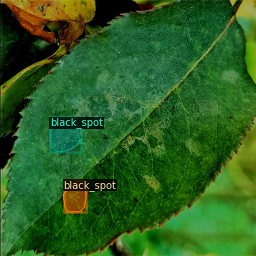

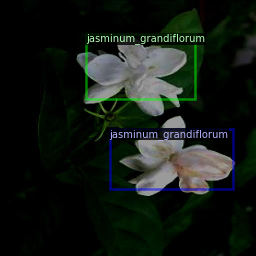

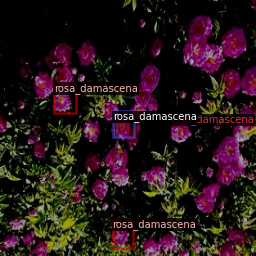

In [8]:
#visualize training data
my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train_2")
dataset_dicts = DatasetCatalog.get("my_dataset_train_2")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [9]:

from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder= None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [10]:
#from .detectron2.tools.train_net import Trainer
#from detectron2.engine import DefaultTrainer
# select from modelzoo here: https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md#coco-object-detection-baselines

from detectron2.config import get_cfg
from detectron2.evaluation.coco_evaluation import COCOEvaluator
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train_2",)
cfg.DATASETS.TEST = ("my_dataset_test_2",)

cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001


cfg.SOLVER.WARMUP_ITERS = 1500
cfg.SOLVER.MAX_ITER = 1500 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05




cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 31 #your number of classes + 1

cfg.TEST.EVAL_PERIOD = 1000


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[11/20 14:09:34 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_68b088.pkl: 421MB [00:06, 65.9MB/s]                           


[11/20 14:09:45 d2.engine.train_loop]: Starting training from iteration 0
[11/20 14:10:08 d2.utils.events]:  eta: 0:29:30  iter: 19  total_loss: 4.475  loss_cls: 3.514  loss_box_reg: 0.791  loss_rpn_cls: 0.194  loss_rpn_loc: 0.020  time: 1.1837  data_time: 0.0281  lr: 0.000014  max_mem: 7237M
[11/20 14:10:31 d2.utils.events]:  eta: 0:28:05  iter: 39  total_loss: 3.888  loss_cls: 3.048  loss_box_reg: 0.776  loss_rpn_cls: 0.149  loss_rpn_loc: 0.013  time: 1.1602  data_time: 0.0158  lr: 0.000027  max_mem: 7237M
[11/20 14:10:55 d2.utils.events]:  eta: 0:28:07  iter: 59  total_loss: 2.884  loss_cls: 1.967  loss_box_reg: 0.745  loss_rpn_cls: 0.175  loss_rpn_loc: 0.022  time: 1.1655  data_time: 0.0147  lr: 0.000040  max_mem: 7237M
[11/20 14:11:19 d2.utils.events]:  eta: 0:27:54  iter: 79  total_loss: 2.092  loss_cls: 1.165  loss_box_reg: 0.758  loss_rpn_cls: 0.118  loss_rpn_loc: 0.016  time: 1.1727  data_time: 0.0174  lr: 0.000054  max_mem: 7237M
[11/20 14:11:42 d2.utils.events]:  eta: 0:27:3

In [11]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

<IPython.core.display.Javascript object>

In [12]:
#test evaluation
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("my_dataset_test_2", cfg, False, output_dir= None)
val_loader = build_detection_test_loader(cfg, "my_dataset_test_2")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [11/20 14:39:21 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/20 14:39:21 d2.data.datasets.coco]: Loaded 20 images in COCO format from ./test/_annotations.coco.json
[11/20 14:39:21 d2.data.common]: Serializing 20 elements to byte tensors and concatenating them all ...
[11/20 14:39:21 d2.data.common]: Serialized dataset takes 0.01 MiB
[11/20 14:39:21 d2.evaluation.evaluator]: Start inference on 20 images
[11/20 14:39:22 d2.evaluation.evaluator]: Inference done 11/20. 0.1514 s / img. ETA=0:00:01
[11/20 14:39:24 d2.evaluation.evaluator]: Total inference time: 0:00:02.342667 (0.156178 s / img per device, on 1 devices)
[11/20 14:39:24 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:02 (0.147489 s / img per device, on 1 devices)
[11/20 14:39:24 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[11/20 14:39:24 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading 

OrderedDict([('bbox',
              {'AP': 28.09070167915343,
               'AP50': 55.160733960550914,
               'AP75': 32.71031184751128,
               'APs': nan,
               'APm': 13.848682487296346,
               'APl': 33.034247326537866,
               'AP-prediction': nan,
               'AP-black_spot': 14.14427157001414,
               'AP-downy_mildew': 22.36056364257115,
               'AP-healthy_leaf_jasmine': nan,
               'AP-healthy_leaf_rose': 70.0,
               'AP-jasminum_grandiflorum': 9.335875692832442,
               'AP-jasminum_sambac': 41.48514851485148,
               'AP-powdery_mildew': 22.774398868458274,
               'AP-rosa_damascena': 16.534653465346533})])

In [13]:
import os
from detectron2.config import get_cfg
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.DATASETS.TEST = ("my_dataset_test_2", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("my_dataset_test_2")

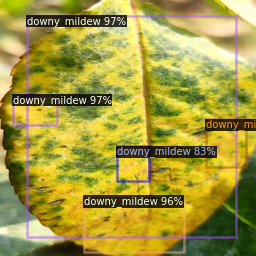

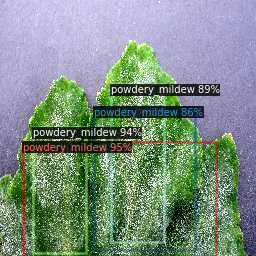

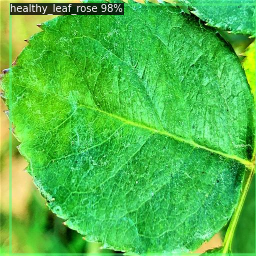

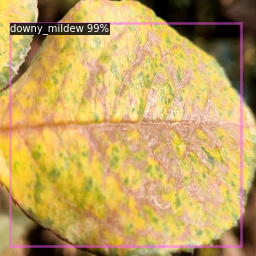

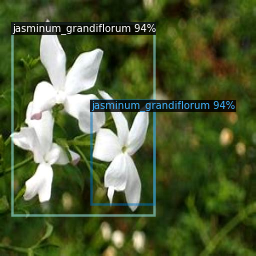

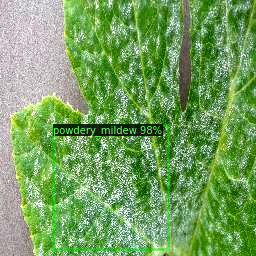

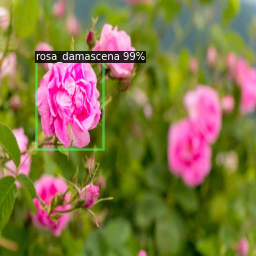

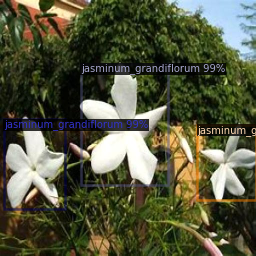

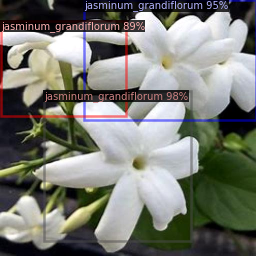

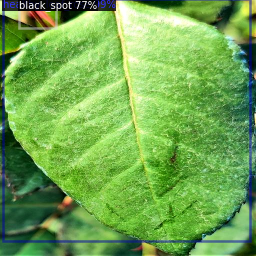

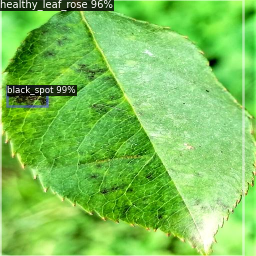

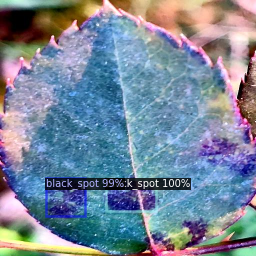

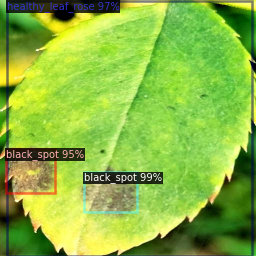

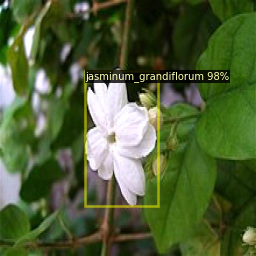

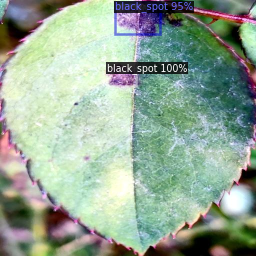

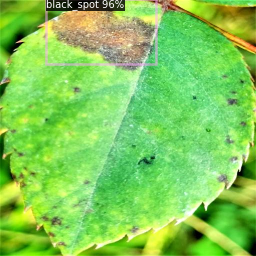

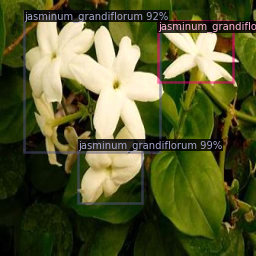

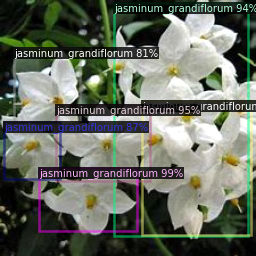

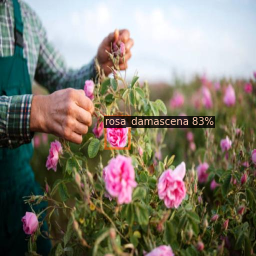

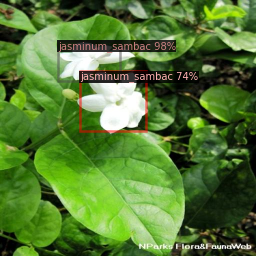

In [14]:
from detectron2.utils.visualizer import ColorMode
import glob

for imageName in glob.glob('./test/*.jpg'):
  im = cv2.imread(imageName)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata, 
                scale=0.5
                 )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])